In [1]:
import tensorflow as tf
from tensorflow import keras
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [2]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')
print(train_text[0:300])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [3]:
import numpy as np

In [4]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [5]:
import re

In [6]:
def clean_str(string):
    string = re.sub(r'[^ ㄱㅡl가-힣]+',"",string)
    return string.lower()

In [7]:
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X ]

In [8]:
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(10):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠포스터보고', '초딩영화줄오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']
['막', '걸음마', '뗀', '세부터', '초등학교', '학년생인', '살용영화별반개도', '아까움']
['원작의', '긴장감을', '제대로', '살려내지못했다']
['별', '반개도', '아깝다', '욕나온다', '이응경', '길용우', '연기생활이몇년인지정말', '발로해도', '그것보단', '낫겟다', '납치감금만반복반복이드라마는', '가족도없다', '연기못하는사람만모엿네']
['액션이', '없는데도', '재미', '있는', '몇안되는', '영화']
['왜케', '평점이', '낮은건데', '꽤', '볼만한데', '헐리우드식', '화려함에만', '너무', '길들여져', '있나']


In [9]:
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

In [10]:
import matplotlib.pyplot as plt

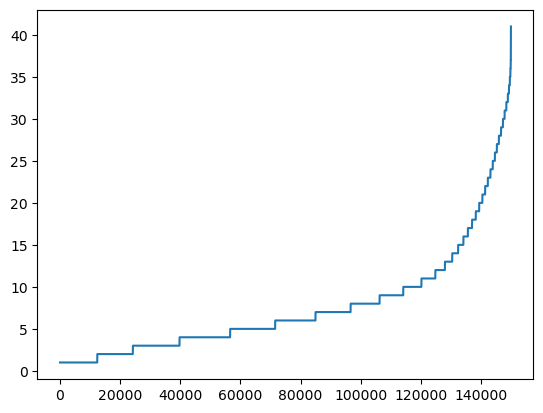

In [11]:
plt.plot(sentence_len)
plt.show()

In [12]:
print(sum([int(i <= 25) for i in sentence_len]))

144646


In [13]:
sentence_new = []
for sentence in sentences:
  sentence_new.append([word[:5] for word in sentence][:25])
sentences = sentence_new

In [14]:
for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠포스터보', '초딩영화줄', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화스파이', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')
print(train_X[:5])

[[  36  899    5 6670 1055    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [6671    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [  67  355 9869    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [  99 5009  843  551    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


In [16]:
model = keras.Sequential([
    keras.layers.Embedding(20000, 300, input_length=25),
    keras.layers.LSTM(units=50, dropout=0.3),
    keras.layers.Dense(2, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 6070302 (23.16 MB)
Trainable params: 6070302 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_X, train_Y, batch_size=128, epochs=5)

Epoch 1/5


1172/1172 [==============================] - 54s 44ms/step - loss: 0.4443 - accuracy: 0.7732
Epoch 2/5
1172/1172 [==============================] - 49s 42ms/step - loss: 0.3503 - accuracy: 0.8287
Epoch 3/5
1172/1172 [==============================] - 50s 42ms/step - loss: 0.3089 - accuracy: 0.8462
Epoch 4/5
1172/1172 [==============================] - 52s 44ms/step - loss: 0.2737 - accuracy: 0.8621
Epoch 5/5
1172/1172 [==============================] - 51s 44ms/step - loss: 0.2452 - accuracy: 0.8758


In [20]:
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X ]

sentences = [sentence.split(' ') for sentence in test_text_X]

sentence_new = []
for sentence in sentences:
  sentence_new.append([word[:5] for word in sentence][:25])
sentences = sentence_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')
model.evaluate(test_X, test_Y, verbose=0)

[0.49540969729423523, 0.7928000092506409]

In [21]:
test_sentence = input("당신의 감정을 입력 : ")
test_sentence = test_sentence.split(' ')
test_sentences= []
now_sentence = []

for word in test_sentence:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
pred = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
  print(sentence)
  print([pred[idx]])



당신의 감정을 입력 : 재미도 좋고
1/1 [==============================] - 0s 313ms/step
['재미도']
[array([0.7025182 , 0.29748175], dtype=float32)]
['재미도', '좋고']
[array([0.00314084, 0.9968592 ], dtype=float32)]
